In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
# load data
data = pd.read_csv('./born_data.csv')

# separate x and y
y_label = '12D Epilepsy identification'
y_df = data[y_label].copy()
y_df[y_df <> 5] = 0
y_df[y_df == 5] = 1
x_df = data.drop(y_label, axis = 1).copy()

In [5]:
for col in x_df.columns:
    if '11 years' in col or '16 years' in col:
        x_df.drop(col, axis = 1, inplace = True)

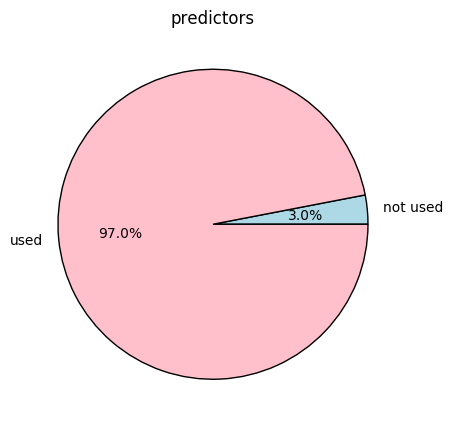

In [21]:
plt.figure(figsize = (5, 5))
plt.pie([len(data.columns)-1-len(x_df.columns), len(x_df.columns)],\
       labels = ['not used', 'used'], autopct = '%.1f%%', colors = ['lightblue', 'pink'])
plt.title('predictors')
plt.show()

In [22]:
print x_df.columns

Index([u'0-3D Sex of child', u'Region at PMS (1958) - Birth',
       u'Region at NCDS1 (1965) - 7 years',
       u'0 Mother's age last birthday,in years',
       u'0 Mother's present marital status',
       u'0 Interval between marriage & 1st birth',
       u'0 Socio-economic group mother's husband (GRO 1951)',
       u'0 Social class mother's husband (GRO 1951)',
       u'0 Husband's age in years,1958',
       u'0  Was mum at sch. after min.leaving age',
       u'0  SEG maternal GPa as mum left school (GRO 1951)',
       u'0  SEG maternal GPa-Miner,foreman code (GRO 1951)',
       u'0  Mothers fathers social class (GRO 1951)',
       u'0  Mums fathers soc class + miner codes (GRO 1951)',
       u'0  Siblings alive,dead when mum left sch',
       u'0  Birth order - mums live siblings',
       u'0  Birth order-all mums siblings',
       u'0  Siblings alive when mum left school',
       u'0 Mums paid job when starting this baby (GRO 1951)',
       u'0 Mums paid job during pregnancy (GRO 